# Econometrics: Ordinary Linear Regression and Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
root = '/Users/W.YSun/Desktop/python'
df = pd.read_csv(root+'/Advertising.csv')
df.head()

,Order,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Order,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


## Linear Regression

In [6]:
# fit the model with .fit() and show results
ad_model = ols('sales~TV', data = df).fit()

In [7]:
# Inspect the results
print(ad_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.47e-42
Time:                        17:55:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

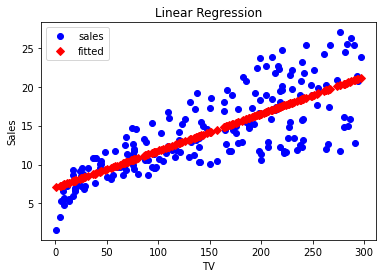

In [8]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(ad_model, 1, ax=ax, vlines=False)
ax.set_ylabel("Sales")
ax.set_xlabel("TV")
ax.set_title("Linear Regression")
plt.show()

In [9]:
# fit the model with .fit() and show results
ad_model12 = ols('sales~TV+radio+newspaper', data = df).fit()

In [10]:
# Inspect the results
print(ad_model12.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        17:55:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

We interpret βj as the average effect on Y of a one unit increase in Xj , holding all other predictors fixed.

## Logistical Regression

## $ p(X) = \frac{exp(\beta_{0} + \beta_{1}X)}{1+exp( \beta_{0} + \beta_{1}X)}$ 

In a logistic regression model, increasing X by one unit changes the log odds by β1 or equivalently it multiplies the odds by exp (β1).

In [11]:
from statsmodels.formula.api import logit

In [12]:
#This prints information on the dataset variables
print( sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [13]:
dta = sm.datasets.fair.load_pandas().data 
dta['affair'] = (dta['affairs'] > 0).astype(float)
print(dta.head(10))

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   
5            4.0  27.0          9.0       0.0        2.0  14.0         3.0   
6            5.0  37.0         23.0       5.5        2.0  12.0         5.0   
7            5.0  37.0         23.0       5.5        2.0  12.0         2.0   
8            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
9            3.0  27.0          6.0       0.0        1.0  16.0         3.0   

   occupation_husb   affairs  affair  
0              5.0  0.111111     1.0  
1              4.0  3.230769     1.0  
2              5.0  1.40

In [14]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [15]:
# MLE
affair_mod = logit('affair ~ occupation + educ + occupation_husb \
                    + rate_marriage + age + yrs_married \
                    + children + religious', data = dta).fit()
print(affair_mod.summary())

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 Sep 2021   Pseudo R-squ.:                  0.1327
Time:                        17:56:00   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation    

In [16]:
#Marginal Effects
mfx = affair_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0293      0.006      4.744      0.000       0.017       0.041
educ               -0.0072      0.003     -2.538      0.011      -0.013      -0.002
occupation_husb     0.0023      0.004      0.541      0.589      -0.006       0.010
rate_marriage      -0.1308      0.005    -26.891      0.000      -0.140      -0.121
age                -0.0110      0.002     -5.937      0.000      -0.015      -0.007
yrs_married         0.0201      0.002     10.327      0.000       0.016       0.024
children           -0.0008      0.006     -0.134      0.893      -0.012       0.011
religious          -0.0685      0.006    -11.119      0.000      -0.081      -0.056


In [17]:
# We can also access the accuracy of the model predictions

In [18]:
affair_mod.pred_table()

array([[3882.,  431.],
       [1326.,  727.]])